### Note:
- This notebook only process three types of experiment data which are:
1. EMG measurement from three channels
2. Elbow flexion / extension

In [41]:
import os
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

import scipy
from scipy import signal
from scipy.signal import freqz

import math

### Prepare the functions of filter

In [ ]:
def band_pass(time, emg, low_pass = 10, fs = 2000, high_band = 20, low_band = 450, order = ):
    """
    time: Time duration
    emg: EMG data
    high: high pass filter cut off frequency
    low: low pass filter cut off frequency
    fs: sampling frequency
    """
    # normalize cut-off frequency by sampling frequency
    high_band = high_band / (fs / 2)
    low_band = low_band / (fs / 2)
    # create bandpass filter gain
    b, a = scipy.singal.butter()
    

In [ ]:
def filteremg(time, emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/(sfreq/2)
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(time, emg)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(time, emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(time, emg_envelope)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.ylim(-1.5, 1.5)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')
    
    plt.subplot(1, 4, 4)
    plt.subplot(1, 4, 4).set_title('Focussed region')
    plt.plot(time[int(0.9*1000):int(1.0*1000)], emg_envelope[int(0.9*1000):int(1.0*1000)])
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlim(0.9, 1.0)
    plt.ylim(-1.5, 1.5)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=11,h=7)
    fig.savefig(fig_name)

# show what different low pass filter cut-offs do
for i in [3, 10, 40]:
    filteremg(time, emg_correctmean, low_pass=i)

### Data Preprocessing
1. Full-wave rectification
2. Remove the noise from data by using Butterworth Filter
3. Feature extraction
4. Dimensionality Reduction (*Optional)
5. Save the data as '.csv' file

In [14]:
path = r'/home/jerry/GitHub/EMG_regressive_model/data_process/raw_data'
all_files = glob.glob(path+'/*.csv')
dfList = []

In [15]:
# Setup the parameters of signal
fs = 2000


In [34]:
# Read .csv file by using panda

# for filename in all_files:
file = all_files[0]
saveName = file[-11:-4]
print(file)
allData = pd.read_csv(file, skiprows = 4, header = None)

# Create the dataframe for EMG data and Joint angle
emgData = allData.iloc[:, 3:6]
angleData = allData.iloc[:, 32:33]

#Convert the dataframe to numpy array
emg = emgData.to_numpy()
time = np.array([i/2000 for i in range(0, len(emg), 1)]) # sampling rate 2000 Hz
mean = np.mean(emg, axis = 0)
emgAvg = emg - mean

angle = angleData.to_numpy()
# Perform the full wave rectification
rectEmg = np.absolute(emgAvg)

# 

/home/jerry/GitHub/EMG_regressive_model/data_process/raw_data/2021-06-08-13-30_CUBE elbow data collection_4.4_T_3.csv


51840

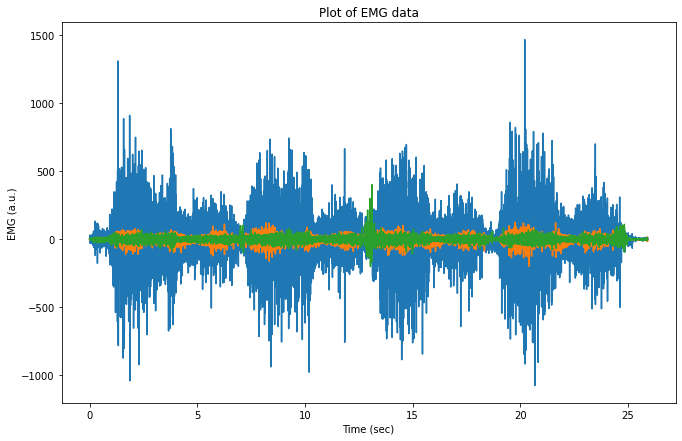

In [39]:
fig = plt.figure()
plt.plot(time, emg)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
plt.title('Plot of EMG data')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)

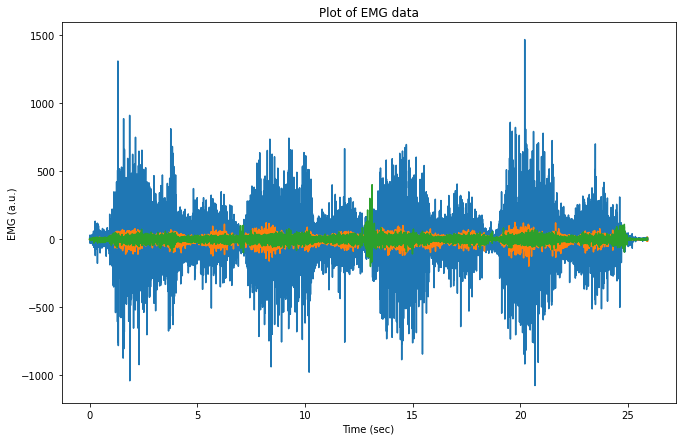

In [40]:
fig = plt.figure()
plt.plot(time, emgAvg)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
plt.title('Plot of EMG data')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)

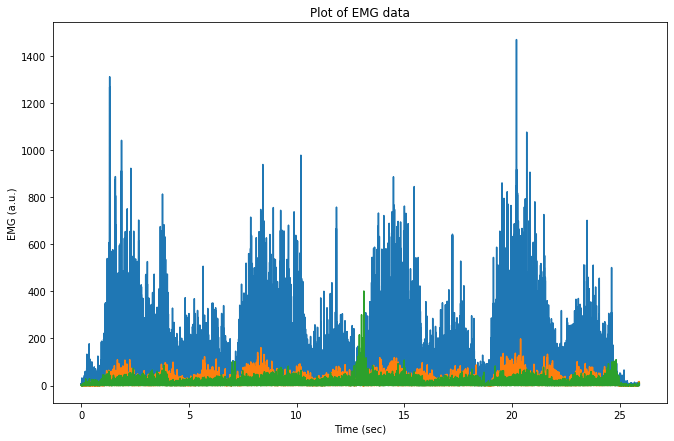

In [36]:
ch1 = emg[:, 1]

fig = plt.figure()
plt.plot(time, rectEmg)
plt.xlabel('Time (sec)')
plt.ylabel('EMG (a.u.)')
plt.title('Plot of EMG data')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)


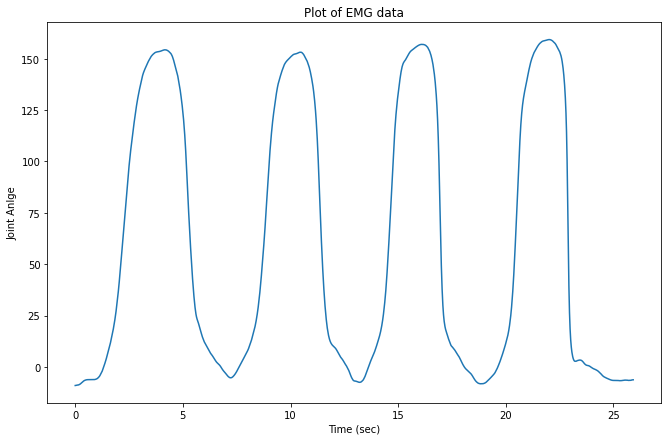

In [90]:
fig = plt.figure()
plt.plot(time, angle)
plt.xlabel('Time (sec)')
plt.ylabel('Joint Anlge')
plt.title('Plot of EMG data')
fig_name = 'fig2.png'
fig.set_size_inches(w=11,h=7)
fig.savefig(fig_name)

51840